Epoch 1/20


C:\Hubert\Programy\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1434
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0362
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0355
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0223
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0184
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160
Epoch 13/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169
Epoch 14/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 15/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147
Epoch 16/20
44/44 ━━━━━━━━━━━━

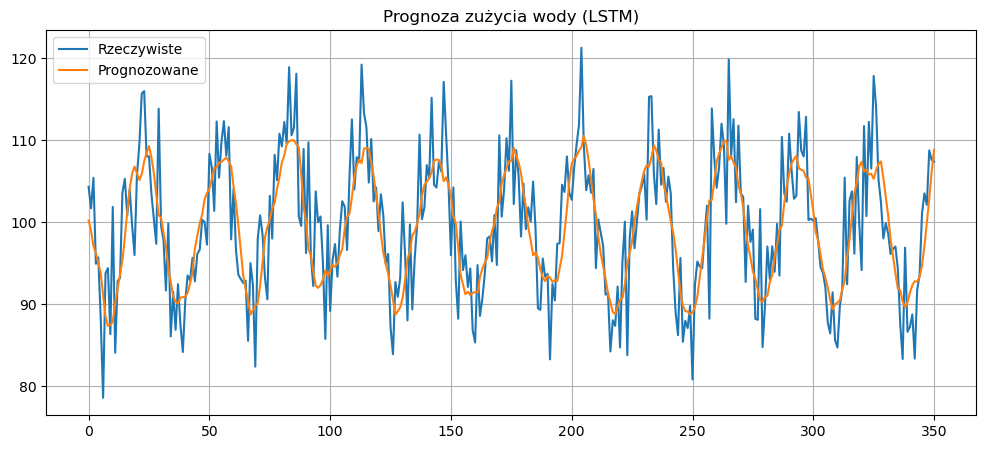

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Symulacja danych - zużycie wody (w litrach)
np.random.seed(0)
days = 365
time = np.arange(days)
water_usage = 100 + 10*np.sin(2 * np.pi * time / 30) + np.random.normal(0, 5, size=days)
water_usage = water_usage.reshape(-1, 1)

# Normalizacja
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(water_usage)

# Tworzenie sekwencji
def create_dataset(dataset, look_back=14):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 14
X, y = create_dataset(data_scaled, look_back)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=8, verbose=1)

# Prognoza
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
real = scaler.inverse_transform(y.reshape(-1, 1))

# Wykres
plt.figure(figsize=(12,5))
plt.plot(real, label='Rzeczywiste')
plt.plot(predicted, label='Prognozowane')
plt.title('Prognoza zużycia wody (LSTM)')
plt.legend()
plt.grid()
plt.show()


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Dane - temperatura i zużycie energii (0 = normalne, 1 = anomalia)
def generate_ac_data(n_samples=1000, timesteps=10):
    X = np.random.normal(22, 1, (n_samples, timesteps))  # temp. ok. 22°C
    y = np.zeros(n_samples)
    anomaly_indices = np.random.choice(n_samples, n_samples // 10, replace=False)
    X[anomaly_indices] += np.random.normal(5, 2, (len(anomaly_indices), timesteps))  # anomalie
    y[anomaly_indices] = 1
    return X.reshape(n_samples, timesteps, 1), y

X, y = generate_ac_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Ocena
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Dokładność wykrywania anomalii: {accuracy:.2f}")


Epoch 1/10


C:\Hubert\Programy\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1550 - loss: 1.1139 - val_accuracy: 0.8850 - val_loss: 0.5313
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9130 - loss: 0.4365 - val_accuracy: 0.8850 - val_loss: 0.3510
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9159 - loss: 0.2943 - val_accuracy: 0.8850 - val_loss: 0.3335
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9189 - loss: 0.2619 - val_accuracy: 0.8850 - val_loss: 0.3203
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8938 - loss: 0.3030 - val_accuracy: 0.8850 - val_loss: 0.3009
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8982 - loss: 0.2697 - val_accuracy: 0.8850 - val_loss: 0.2608
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9048 - loss: 0.2168 - val_accuracy: 0.8850 - val_loss: 0.2065
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9061 - loss: 0.1667 - val_accuracy: 0.8850 - val_loss: 0.1562
Ep

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Symulacja danych: 0 = biurko, 1 = korytarz, 2 = kuchnia
def generate_movement_data(n_samples=1500, timesteps=20):
    X, y = [], []
    for label in range(3):
        for _ in range(n_samples // 3):
            if label == 0:
                sequence = np.random.normal(0.2, 0.1, timesteps)  # siedzenie
            elif label == 1:
                sequence = np.sin(np.linspace(0, 3*np.pi, timesteps)) + np.random.normal(0, 0.2, timesteps)  # chodzenie
            else:
                sequence = np.sin(np.linspace(0, 6*np.pi, timesteps)) + np.random.normal(0, 0.3, timesteps)  # ruch intensywny
            X.append(sequence)
            y.append(label)
    return np.array(X).reshape(-1, timesteps, 1), to_categorical(np.array(y), 3)

X, y = generate_movement_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], 1)))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Ocena
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Dokładność klasyfikacji ruchu: {accuracy:.2f}")


Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5846 - loss: 1.0472 - val_accuracy: 0.8333 - val_loss: 0.5994
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8078 - loss: 0.4429 - val_accuracy: 0.9867 - val_loss: 0.1320
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9800 - loss: 0.1104 - val_accuracy: 0.9967 - val_loss: 0.0221
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.9933 - val_loss: 0.0133
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9997 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9978 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss